In [ ]:
#Dharvi Mittal
#E20CSE018
#EB07

In [40]:
#Importing all the require packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [41]:
#Ques.1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/agaricus-lepiota.data",na_values="?",names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l


In [43]:
#Ques.2
data.shape

(8124, 23)

In [44]:
data.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises?                    8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  5644
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [45]:
#Ques.3
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [46]:
#Ques.4
print("Missing values for each column:\n", data.isnull().sum())

Missing values for each column:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [47]:
print("Total null values",data.isnull().sum().sum())

Total null values 2480


In [48]:
Handling_null_values=data['stalk-root'].fillna(data['stalk-root'].mode()[0], inplace=False)
print(Handling_null_values)

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object


In [49]:
#Ques.6
from sklearn.preprocessing import LabelEncoder
data_string = data.dtypes==object
data_cols = data.columns[data_string].tolist()
le = LabelEncoder()
data[data_cols] = data[data_cols].apply(lambda col: le.fit_transform(col))
data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,4,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,4,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,4,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,4,2,1,7,7,0,2,1,0,7,4,2


In [50]:
#Ques.5
data = data.drop(columns=['veil-type'])
data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,4,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,4,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,4,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,4,2,1,7,7,2,1,0,7,4,2


In [51]:
#Ques.7
X = data.loc[:, data.columns != 'class'].values
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [52]:
Y = data.iloc[:,0].values
Y

array([1, 0, 0, ..., 0, 1, 0])

In [53]:
#Ques.8 and 9
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.7, random_state=42)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2437, 21), (5687, 21), (2437,), (5687,))

In [54]:
#Ques.10
clf=RandomForestClassifier(n_estimators=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [55]:
#Ques.11
test_ConfMat_sklearn = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix on testing set: \n{test_ConfMat_sklearn}")

Confusion Matrix on testing set: 
[[2905    0]
 [  11 2771]]


In [56]:
#Ques.12
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980657640232108


In [84]:
#Ques.13
acc = []
rf = RandomForestClassifier(bootstrap=True, criterion='gini',
 max_depth=2, max_features='auto', max_leaf_nodes=2, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, random_state=10)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_predict_train = rf.predict(x_train)
print("Validation Data Set: ",metrics.accuracy_score(y_test,y_pred)*100)
print("Training Data Set: ",metrics.accuracy_score(y_train,y_predict_train)*100)
acc.append(metrics.accuracy_score(y_test,y_pred))

Validation Data Set:  93.35326182521541
Training Data Set:  94.00902749281904


In [85]:
#Ques.14
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_prob = lr.predict_proba(x_test)[:, 1]
# Classification report and scoring
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2905
           1       0.95      0.94      0.95      2782

    accuracy                           0.95      5687
   macro avg       0.95      0.95      0.95      5687
weighted avg       0.95      0.95      0.95      5687

ROC AUC score: 0.9879299059233752
Accuracy Score:  0.9475997889924389


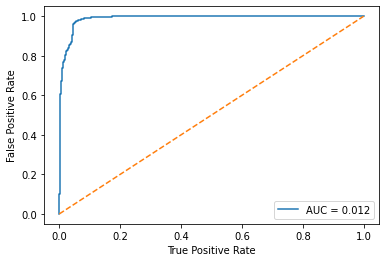

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(true_positive_rate,false_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [90]:
#Additional
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
x_train

array([[ 1.0293036 ,  0.16689758, -0.97871436, ...,  1.44780092,
         0.28810525, -0.87671988],
       [ 1.0293036 ,  0.16689758, -0.97871436, ...,  1.44780092,
         0.28810525,  0.27475754],
       [ 1.0293036 , -1.45031671,  1.76011246, ..., -1.08992925,
         0.28810525, -0.87671988],
       ...,
       [-0.84078552,  0.97550472, -0.19619241, ..., -0.24401919,
         1.06392016,  1.42623495],
       [-0.21742248,  0.16689758, -0.97871436, ...,  1.44780092,
         0.28810525,  1.42623495],
       [-0.21742248, -1.45031671, -0.58745339, ...,  1.44780092,
        -1.26352458, -0.30098117]])

In [92]:
x_test

array([[-0.84078552, -1.45031671, -0.19619241, ..., -0.24401919,
        -0.48770966, -0.30098117],
       [-0.84078552,  0.16689758, -0.97871436, ...,  1.44780092,
         0.28810525,  0.27475754],
       [ 1.0293036 ,  0.97550472, -0.19619241, ...,  1.44780092,
         0.28810525,  0.27475754],
       ...,
       [-0.84078552, -1.45031671,  1.36885148, ..., -0.66697422,
        -2.8151544 , -0.30098117],
       [ 1.0293036 ,  0.16689758, -0.97871436, ...,  1.44780092,
         0.28810525,  0.27475754],
       [-0.21742248,  0.97550472, -0.19619241, ...,  1.44780092,
         0.28810525,  1.42623495]])